#### Problem Statement 1:
In each of the following situations, state whether it is a correctly stated hypothesis
testing problem and why?

- 1. 𝐻0: 𝜇 = 25, 𝐻1: 𝜇 ≠ 25   - **Correct,its a two tailed test**
- 2. 𝐻0: 𝜎 > 10, 𝐻1: 𝜎 = 10   - **Correct, as its a right tailed test**
- 3. 𝐻0: 𝑥 = 50, 𝐻1: 𝑥 ≠ 50   - **Incorrect,it should be population mean**
- 4. 𝐻0: 𝑝 = 0.1, 𝐻1: 𝑝 = 0.5 - **Correct as it is using a population proportion**
- 5. 𝐻0: 𝑠 = 30, 𝐻1: 𝑠 > 30    - **Incorrect, it should be population variance**

#### Problem Statement 2:
- The college bookstore tells prospective students that the average cost of its textbooks is Rs. 52 with a standard deviation of Rs. 4.50. A group of smart statistics students thinks that the average cost is higher. To test the bookstore’s claim against their alternative, the students will select a random sample of size 100. Assume that the mean from their random sample is Rs. 52.80. Perform a hypothesis test at the 5% level of significance and state your decision.

- `Null Hypotheses` **H0:𝜇 = 52**
- `Alternate Hypotheses` **H1:𝜇 > 52**

In [34]:
import numpy as np
from scipy import stats

In [35]:
def z_statistics(n,sample_mean,pop_mean,pop_std_dev):
    std_error = pop_std_dev/np.sqrt(n)
    z_statistic = (sample_mean - pop_mean)/std_error
    return z_statistic

In [36]:
def one_sided_z_test(alpha):
    z_alpha = 1 - alpha
    z_critical = stats.norm.ppf(z_alpha)
    return round(z_critical,3)

In [37]:
def hypotheses_decision(z_stats,z_critical):
    if np.absolute(z_stats) >= np.positive(z_critical):
        return "Null Hypotheses is Rejected"
    else:
        return "Null Hypotheses is Accepted"

In [38]:
n = 100
x = 52.80
mu = 52
sigma = 4.50
alpha = 0.05
z_stats = z_statistics(100,52.80,52,4.50)
print("Z_Stats: ",round(z_stats,4))
print('---------------------')
z_critical_test = one_sided_z_test(alpha)
print('Critical Value: ',z_critical_test)
print('--------------------------')
print(hypotheses_decision(z_stats,z_critical_test))

Z_Stats:  1.7778
---------------------
Critical Value:  1.645
--------------------------
Null Hypotheses is Rejected


**That implies that the average price is not equal to 52. NULL Hypotheses is Rejected and Alternate is Selected**

#### Problem Statement 3:
- A certain chemical pollutant in the Genesee River has been constant for several years with mean μ = 34 ppm (parts per million) and standard deviation σ = 8 ppm. A group of factory representatives whose companies discharge liquids into the river is now claiming that they have lowered the average with improved filtration devices. A group of environmentalists will test to see if this is true at the 1% level of significance. Assume that their sample of size 50 gives a mean of 32.5 ppm.Perform a hypothesis test at the 1% level of significance and state your decision

- `Null Hypotheses` **H0:𝜇 = 34**
- `Alternate Hypotheses` **H1:𝜇 < 34**

In [39]:
n = 50
x = 32.5
𝜇 = 34
pop_var = 8
alpha = 0.01
print('--------------------------')
z_stats = z_statistics(n,x,𝜇,pop_var)
print('Z_Test: ',round(z_stats,3))
print('--------------------------')
z_critical_test = one_sided_z_test(alpha)
print('Critical Value: ',z_critical_test)
print('--------------------------')
print(hypotheses_decision(z_stats,z_critical_test))

--------------------------
Z_Test:  -1.326
--------------------------
Critical Value:  2.326
--------------------------
Null Hypotheses is Accepted


**That implies that the factory representatives' claim is False. The average is still the same**

## Problem Statement 4:  
Based on population figures and other general information on the U.S. population,suppose it has been estimated that, on average, a family of four in the U.S. spends about $1135 annually on dental expenditures. Suppose further that a regional dental association wants to test to determine if this figure is accurate for their area of country. To test this, 22 families of 4 are randomly selected from the population in that area of the country and a log is kept of the family’s dental expenditure for one year. The resulting data are given below. Assuming, that dental expenditure is normally distributed in the population, use the data and an alpha of 0.5 to test the dental association’s hypothesis.  
1008, 812, 1117, 1323, 1308, 1415, 831, 1021, 1287, 851, 930, 730, 699,872, 913, 944, 954, 987, 1695, 995, 1003, 994

- `Null Hypotheses` **H0:𝜇 = 1135**
- `Alternate Hypotheses` **H1:𝜇 ≠ 1135**

In [40]:
## As the number of samples are < 30 and population variance is unknown
def t_statistics(data,pop_mean):
    t_Stats,p_value = stats.ttest_1samp(data,pop_mean) ## for 1 Sample
    return round(t_Stats,3),round(p_value,3)

#### To find the T critical value in Python, you can use the scipy.stats.t.ppf() function, which uses the following syntax:

**scipy.stats.t.ppf(q, df)**

where:

q: The significance level to use  
df: The degrees of freedom

In [41]:
## To calculate T-critical value
import scipy
t_critical = scipy.stats.t.ppf(1-alpha/2,21)
print(t_critical)

2.831359558017186


In [42]:
def hypotheses_decision_with_p_value(p_value,alpha):
    if p_value <= alpha:
        return "Null Hypotheses is Rejected"
    else:
        return "Null Hypotheses is Accepted"

In [43]:
sample_data = np.array([1008, 812, 1117, 1323, 1308, 1415, 831, 1021, 1287, 851, 930, 730, 699,
872, 913, 944, 954, 987, 1695, 995, 1003, 994])
sample_mean = round(np.mean(sample_data),3)
print("Sample Mean: ",sample_mean)
print('--------------------------')
sample_std_dev = round(np.std(sample_data,ddof=1),3) ##Bessel's Correlation
print("Sample Std Deviation: ",sample_std_dev)

Sample Mean:  1031.318
--------------------------
Sample Std Deviation:  240.375


In [44]:
## Verifying the sample std deviation
sum = 0
for i in sample_data:
    sum += (i - sample_mean)**2
print(np.sqrt(sum/21))

240.3745859247108


In [45]:
n = 22
sample_mean = round(np.mean(sample_data),3)
𝜇 = 1135
alpha = 0.5
##sample_std_dev = round(np.std(sample_data,ddof=1),3) ##Bessel's Coorelation
# t_stats = t_statistics(sample_data,𝜇)
# print('T_Test: ',round(t_stats,3))
# print('--------------------------')
t_stats,p_value = t_statistics(sample_data,𝜇)
print('T_Test Value: ',t_stats)
print('--------------------------')
print('One sided p Value: ',p_value)
## As its a 2- tailed test
p_value = p_value*2
print('Two sided p Value: ',p_value)
print('--------------------------')
print(hypotheses_decision_with_p_value(p_value,alpha))

T_Test Value:  -2.023
--------------------------
One sided p Value:  0.056
Two sided p Value:  0.112
--------------------------
Null Hypotheses is Rejected


**That implies that the on average, a family of four in the U.S. does not spends about 1135 annually on dental expenditures**

## Problem Statement 5:  
In a report prepared by the Economic Research Department of a major bank the Department manager maintains that the average annual family income on Metropolis is 48,432.**What do you conclude about the validity of the report if a random sample of 400 families shows and average income of 48,574 with a standard deviation of 2000?**

- `Null Hypotheses` **H0:𝜇 = 48432**
- `Alternate Hypotheses` **H1:𝜇 ≠ 48432**

In [46]:
scipy.stats.zscore

<function scipy.stats.stats.zscore(a, axis=0, ddof=0, nan_policy='propagate')>

In [47]:
## to find the critical z_value
def two_sided_z_test(alpha):
    z_alpha = 1 - (alpha/2)
    z_critical = stats.norm.ppf(z_alpha)
    return round(z_critical,3)

In [48]:
## As the sample size is large and central theroem holds good, we will use Z-test
pop_mean = 48432
n = 400
sam_mean = 48574
sam_std_dev = 2000
Z_Test = z_statistics(n,sam_mean,pop_mean,sam_std_dev)
print('Z_Score: ',round(Z_Test,3))

Z_Score:  1.42


In [49]:
alpha = 0.05 ##assuming
z_critical = two_sided_z_test(alpha)
print('z_critical: ',round(z_critical,3))

z_critical:  1.96


In [50]:
hypotheses_decision(Z_Test,z_critical)

'Null Hypotheses is Accepted'

**That implies that the report is valid and the mean annual family income is 48,432.**

## Problem Statement 6:
Suppose that in past years the average price per square foot for warehouses in the
United States has been 32.28. A national real estate investor wants to determine
whether that figure has changed now. The investor hires a researcher who randomly
samples 19 warehouses that are for sale across the United States and finds that the
mean price per square foot is 31.67, with a standard deviation of 1.29. assume
that the prices of warehouse footage are normally distributed in population. If the
researcher uses a 5% level of significance, what statistical conclusion can be
reached? What are the hypotheses?

- `Null Hypotheses` **H0:𝜇 = 32.28**
- `Alternate Hypotheses` **H1:𝜇 ≠ 32.28**

In [51]:
def t_statistics_with_data(n,sample_mean,pop_mean,sam_std_dev):
    std_error = sam_std_dev/np.sqrt(n)
    t_statistic = (sample_mean - pop_mean)/std_error
    return t_statistic

In [52]:
## Sample size is less than 30 and population variance/std dev is unknown
pop_mean = 32.28
n = 19
sam_mean = 31.67
sam_std_dev = 1.29
T_Stats = t_statistics_with_data(n,sam_mean,pop_mean,sam_std_dev)
print('T_Test: ',round(T_Stats,3))


T_Test:  -2.061


In [53]:
alpha = 0.05
df = n-1
##print(df)
t_critical_score = stats.t.ppf(1-(alpha/2),df)
print('t_critical_score: ',round(t_critical_score,3))

t_critical_score:  2.101


In [54]:
hypotheses_decision(T_Stats,t_critical_score)

'Null Hypotheses is Accepted'

**That implies that average price per square foot is 32.28**

## Problem Statement 7:
- Fill in the blank spaces in the table and draw your conclusions from it.
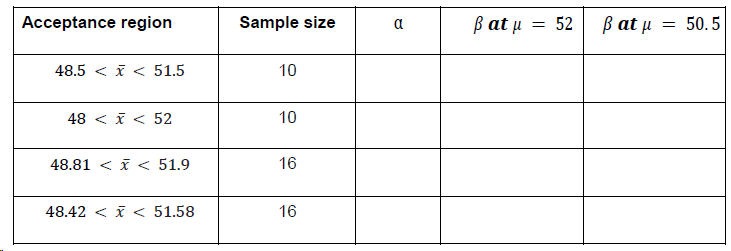

## Problem Statement 8:
Find the t-score for a sample size of 16 taken from a population with mean 10 when the sample mean is 12 and the sample standard deviation is 1.5.

In [55]:
pop_mean = 10
sam_mean = 12
sam_std_deviation = 1.5
n = 16

T_Stats = t_statistics_with_data(n,sam_mean,pop_mean,sam_std_deviation)
print('T_Stats: ',round(T_Stats,3))


T_Stats:  5.333


## Problem Statement 9:
Find the t-score below which we can expect 99% of sample means will fall if samples of size 16 are taken from a normally distributed population.

In [56]:
alpha = 0.01
n = 16
df = n-1

t_critical_score = stats.t.ppf(1-(alpha/2),df)
print("T_Score below which we can expect 99% of sample means will fall: ",t_critical_score)

T_Score below which we can expect 99% of sample means will fall:  2.946712883338615


## Problem Statement 10:
If a random sample of size 25 drawn from a normal population gives a mean of 60 and a standard deviation of 4, find the range of t-scores where we can expect to find the middle 95% of all sample means. Compute the probability that (−𝑡0.05 <𝑡<𝑡0.10).

In [58]:
n = 25
sam_mean = 60
sam_std_dev = 4
alpha = 0.05
p = 1- alpha/2
df = n-1

In [61]:
def ci(n,sam_mean,s,p):
    margin_of_err = stats.t.ppf(p,n-1)*(s/np.sqrt(n))
    ls = sam_mean - margin_of_err
    hs = sam_mean + margin_of_err
    return ls,hs

In [62]:
ci (n,sam_mean,sam_std_dev,p)

(58.348881150697586, 61.651118849302414)

In [63]:
#p(-t0.05<t<t0.1) = p(t0.1) - p(-t0.05) = 1- p(t0.1) - p(t0.05)
prob = 1-0.05-0.1
prob

0.85

## Problem Statement 11:
Two-tailed test for difference between two population means.  
Is there evidence to conclude that the number of people travelling from Bangalore to Chennai is different from the number of people travelling from Bangalore to Hosur in
a week, given the following:  
Population 1: Bangalore to Chennai   
n1 = 1200  
x1 = 452  
s1 = 212  
Population 2: Bangalore to Hosur  
n2 = 800  
x2 = 523  
s2 = 185

- `Null Hypotheses` **H0:𝜇1-𝜇2 = 0**
- `Alternate Hypotheses` **H1:𝜇1-𝜇2 ≠ 0**

In [66]:
def ztest_with_independent_samples(mean1,mean2,s1,s2,n1,n2):
    se = np.sqrt(s1**2/n1 + s2**2/n2)
    print("Std Error: ",round(se,3))
    z_value = (mean1-mean2)/se
    return round(z_value,3)

In [67]:
## Large Sample with Known Pop Std Dev
n1 = 1200
x1 = 452
s1 = 212

n2 = 800
x2 = 523
s2 = 185

In [69]:
z = ztest_with_independent_samples(x1,x2,s1,s2,n1,n2)
print("Z_Test:",z)

Std Error:  8.957
Z_Test: -7.926


In [73]:
p_value = stats.norm.sf(abs(z))*2
p_value

2.263175919910331e-15

In [79]:
alpha = 0.05
hypotheses_decision_with_p_value(p_value,alpha)

'Null Hypotheses is Rejected'

#### It means that number of people travelling from Bangalore to Chennai is different from the number of people travelling from Bangalore to Hosur in a week

## Problem Statement 12:
Is there evidence to conclude that the number of people preferring Duracell battery is different from the number of people preferring Energizer battery, given the following:  
Population 1: Duracell  
n1 = 100  
x1 = 308  
s1 = 84  
Population 2: Energizer  
n2 = 100  
x2 = 254  
s2 = 67  

- `Null Hypotheses` **H0:𝜇1-𝜇2 = 0**
- `Alternate Hypotheses` **H1:𝜇1-𝜇2 ≠ 0**

In [76]:
n1 = 100
x1 = 308
s1 = 84

n2 = 100
x2 = 254
s2 = 67

In [77]:
z = ztest_with_independent_samples(x1,x2,s1,s2,n1,n2)
print("Z Test: ",z)

Std Error:  10.745
Z Test:  5.026


In [78]:
p_values = stats.norm.sf(abs(z))*2
p_values

5.00815885811081e-07

In [80]:
alpha = 0.05
hypotheses_decision_with_p_value(p_values,alpha)

'Null Hypotheses is Rejected'

#### It implies that number of people preferring Duracell battery is different from the number of people preferring Energizer battery

## Problem Statement 13:
Pooled estimate of the population variance  
Does the data provide sufficient evidence to conclude that average percentage increase in the price of sugar differs when it is sold at two different prices?
Population 1:   
Price of sugar = Rs. 27.50  
n1 = 14   
x1 = 0.317%  
s1 = 0.12%  
Population 2:   
Price of sugar = Rs. 20.00  
n2 = 9  
x2 = 0.21%  
s2 = 0.11%  

- `Null Hypotheses` **H0:𝜇1-𝜇2 = 0**
- `Alternate Hypotheses` **H1:𝜇1-𝜇2 > 0**

In [122]:
n1 = 14
mean1 = 27.50
x1 = 0.317
s1 = 0.12

n2 = 9
mean2 = 20.00
x2 = 0.21
s2 = 0.11

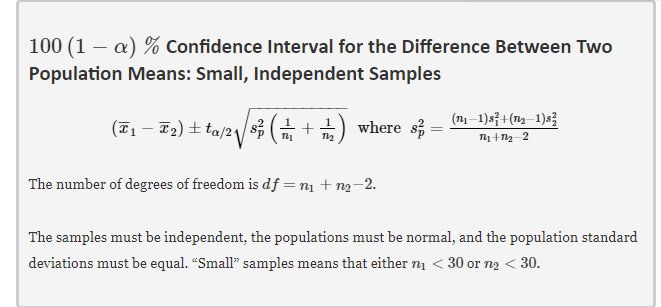

In [123]:
round(std_err,4)

298.9569

In [124]:
## Computing Pooled Sample Variance
alpha = 0.05
p = 1 - alpha ##One sided test
df = n1 + n2 - 2
pooled_var = (((n1 - 1)*s1**2) + ((n2 - 1)*s2**2))/ df
print("Pooled Sample Variance: ",round(pooled_var,4))
print('--------------------')
std_err = np.sqrt(pooled_var/n1 + pooled_var/n2)
print("Standard Error: ",round(std_err,4))
print('--------------------')
margin_of_err = stats.t.ppf(p,n1+n2-2)*std_err
print("Margin of Error: ",round(margin_of_err,4))
print('--------------------')
t_stats = round((x1 - x2),4)/ round(std_err,4)
print("T Stats: ",round(t_stats,4))
print('--------------------')
t_critical_score = stats.t.ppf(1-(alpha),df)
print('t_critical_score: ',round(t_critical_score,3))
print('--------------------')
hypotheses_decision(t_stats,t_critical_score)

Pooled Sample Variance:  0.0135
--------------------
Standard Error:  0.0497
--------------------
Margin of Error:  0.0855
--------------------
T Stats:  2.1529
--------------------
t_critical_score:  1.721
--------------------


'Null Hypotheses is Rejected'

**It infers that the data provided is sufficient enough that average price INCREASES**

## Problem Statement 14:
The manufacturers of compact disk players want to test whether a small price reduction is enough to increase sales of their product. Is there evidence that the small price reduction is enough to increase sales of compact disk players?  
Population 1: Before reduction  
n1 = 15  
x1 = Rs. 6598   
s1 = Rs. 844  
Population 2: After reduction n2 = 12  
x2 = RS. 6870  
s2 = Rs. 669  

- `Null Hypotheses` **H0:𝜇1-𝜇2 = 0**
- `Alternate Hypotheses` **H1:𝜇1-𝜇2 > 0**

In [127]:
n1 = 15
x1 = 6598
s1 = 844
n2 = 12
x2 = 6870
s2 = 669

In [128]:
## Computing Pooled Sample Variance
alpha = 0.05
p = 1 - alpha ##One sided test
df = n1 + n2 - 2
pooled_var = (((n1 - 1)*s1**2) + ((n2 - 1)*s2**2))/ df
print("Pooled Sample Variance: ",round(pooled_var,4))
print('--------------------')
std_err = np.sqrt(pooled_var/n1 + pooled_var/n2)
print("Standard Error: ",round(std_err,4))
print('--------------------')
margin_of_err = stats.t.ppf(p,n1+n2-2)*std_err
print("Margin of Error: ",round(margin_of_err,4))
print('--------------------')
t_stats = round((x1 - x2),4)/ round(std_err,4)
print("T Stats: ",round(t_stats,4))
print('--------------------')
t_critical_score = stats.t.ppf(1-(alpha),df)
print('t_critical_score: ',round(t_critical_score,3))
print('--------------------')
hypotheses_decision(t_stats,t_critical_score)

Pooled Sample Variance:  595835.0
--------------------
Standard Error:  298.9569
--------------------
Margin of Error:  510.6605
--------------------
T Stats:  -0.9098
--------------------
t_critical_score:  1.708
--------------------


'Null Hypotheses is Accepted'

**It infers that there is no evidence that the small price reduction is enough to increase sales of compact disk players**

## Problem Statement 15:
Comparisons of two population proportions when the hypothesized difference is zero.  
Carry out a two-tailed test of the equality of banks’ share of the car loan market in 1980 and 1995.  
Population 1: 1980  
n1 = 1000  
x1 = 53  
𝑝1 = 0.53  
Population 2: 1985  
n2 = 100  
x2 = 43  
𝑝2= 0.53  

- `Null Hypotheses` **H0:p1-p2 = 0**
- `Alternate Hypotheses` **H1:p1-p2 ≠ 0**
`where p is a population proprtion`

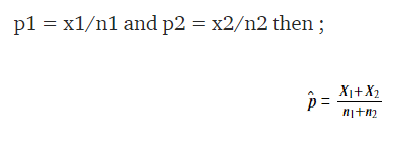
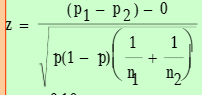

In [133]:
##Population 1: 1980
n1 = 100
x1 = 53
𝑝1 = 0.53
##Population 2: 1985
n2 = 100
x2 = 43
𝑝2 = 0.43

In [136]:
(p_hat*(1-p_hat)*(1/n1 + 1/n2))

0.004992

In [143]:
alpha = 0.10
p_hat = (x1 + x2) / (n1 + n2)
print("Population Propotion: ",p_hat)
z_test = (p1-p2)/np.sqrt(p_hat*(1-p_hat)*(1/n1 + 1/n2))
print('------------------')
print("Z_Test: ",z_test)
print('------------------')
z_critical = two_sided_z_test(alpha)
print("Z_Critical: ",z_critical)
print("Even at 10% significance level, Null Hypotheses is NOT Rejected")
hypotheses_decision(z_test,z_critical)


Population Propotion:  0.48
------------------
Z_Test:  1.4153462926807452
------------------
Z_Critical:  1.645
Even at 10% significance level, Null Hypotheses is NOT Rejected


'Null Hypotheses is Accepted'

## Problem Statement 16:
Carry out a one-tailed test to determine whether the population proportion of traveler’s check buyers who buy at least $2500 in checks when sweepstakes prizes are offered as at least 10% higher than the proportion of such buyers when no
sweepstakes are on.  
Population 1: With sweepstakes  
n1 = 300  
x1 = 120  
𝑝1 = 0.40  
Population 2: No sweepstakes n2 = 700  
x2 = 140  
𝑝2= 0.20  

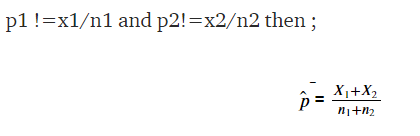
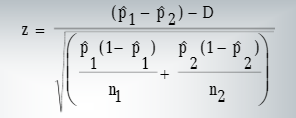

- `Null Hypotheses` **H0:p1-p2 <= 0.1**
- `Alternate Hypotheses` **H1:p1-p2 > 0.1**
`where p is a population proprtion`

In [144]:
##Population 1: With sweepstakes
n1 = 300
x1 = 120
𝑝1 = 0.40
##Population 2: No sweepstakes 
n2 = 700
x2 = 140
𝑝2= 0.20

In [148]:
alpha = 0.05
d = 0.1 ## hypothese difference
p_hat = (x1 + x2) / (n1 + n2)
print("Population Propotion: ",p_hat)
z_test = ((p1-p2) - d)/np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
print('------------------')
print("Z_Test: ",z_test)
print('------------------')
z_critical = one_sided_z_test(alpha)
print("Z_Critical: ",z_critical)
print('------------------')
hypotheses_decision(z_test,z_critical)

Population Propotion:  0.26
------------------
Z_Test:  3.1180478223116177
------------------
Z_Critical:  1.645
------------------


'Null Hypotheses is Rejected'

## Problem Statement 17:
A die is thrown 132 times with the following results:   
Number turned up: 1, 2, 3, 4, 5, 6  
Frequency: 16, 20, 25, 14, 29, 28  
Is the die unbiased? Consider the degrees of freedom as 𝑝 − 1.  

**Null Hypotheses H0 : The die is unbiased**  
**Alternate Hypotheses H1 : The die is biased**

In [163]:
def chi_test(observed,expected):
    ##print(observed)
    sum = 0
    for i in observed:
        sum += ((i - expected)**2) / expected
    ##print(sum)
    return sum

In [172]:
def chi_critical(alpha,df):
    chi_sq_crtical_value = stats.chi2.ppf(1- alpha,df)
    return chi_sq_crtical_value

In [169]:
chi_crtical_value = stats.chi2.ppf(1-.05,5)
print(chi_crtical_value)
print(stats.chi2.cdf(chi_crtical_value,5))

11.070497693516351
0.95


In [174]:
f = np.array([16, 20, 25, 14, 29, 28])
##print(f)
df = 6 - 1
alpha = 0.05
expected_mean = 132/6
print("Expected Value: ",expected_mean)
print('-------------')
print("Chi Square Test Value: ",chi_test(f,expected_mean))
print('-------------')
print("Chi Square Critical Value: ",chi_critical(alpha,df))
print('-------------')
hypotheses_decision(chi_test(f,expected_mean),chi_critical(alpha,df))

Expected Value:  22.0
-------------
Chi Square Test Value:  9.0
-------------
Chi Square Critical Value:  11.070497693516351
-------------


'Null Hypotheses is Accepted'

**The die is Unbiased**